# 3. Оценка качества моделей

# Backtest Forecast Models

In [1]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


Observations: 2820
Training Observations: 1861
Testing Observations: 959


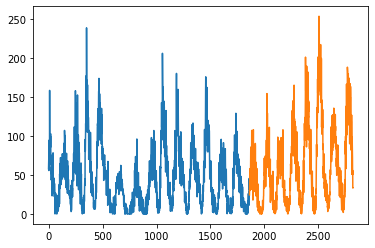

In [2]:
# plot train-test split of time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Библиотека scikit-learn предоставляет нам возможность многократного разбиения выборки, используя команду TimeSeriesSplit, которая выдает индексы наблюдений для обучающего и тестового набора. Для имеющегося количества наблюдений (n samples) нужно лишь задать число разбиений (n splits) и номер итераций (i):
* training size = i *n samples / (n splits + 1) + n samples mod (n splits + 1)
* test size = n samples / (n splits + 1)

Произведем 3 разбиения.

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


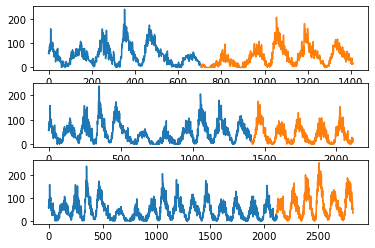

In [3]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

На практике мы, скорее всего, будем заново обучать нашу модель по мере поступления новых данных. Это позволит делать хорошие прогнозы на каждом временном шаге. Можно оценить модели машинного обучения при этом предположении. Для этого нужно принять несколько решений:
1. Минимальное количество наблюдений. Во-первых, мы должны выбрать минимальное количество наблюдений, необходимое для обучения модели. Это можно рассматривать как ширину окна, если используется скользящее окно (см. следующий пункт).
2. Скользящее или расширяющееся окно. Далее нам нужно решить, будет ли модель обучаться на всех имеющихся данных или только на самых последних наблюдениях. Это определяет, будет ли использоваться скользящее или расширяющееся окно. 

После этого можно обучать и оценивать модели:
1. Начиная с начала временного ряда, используется минимальное количество наблюдений для обучения модели.
2. Модель делает прогноз для следующего временного шага.
3. Прогноз сохраняется или сравнивается с известным значением.
4. Окно расширяется и включает известное значение, и процесс повторяется (перейдите к шагу 1.) 

In [4]:
# walk forward evaluation model for time series data
from pandas import read_csv
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
	print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

# Forecasting Performance Measures

Ошибка прогноза рассчитывается, как разность между ожидаемым и прогнозируемым значением: 
* forecast error = expected value - predicted value

In [1]:
# calculate forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


Средняя ошибка прогноза рассчитывается, как среднее значение ошибок прогноза: 
* mean forecast error = mean(forecast error) 

In [2]:
# calculate mean forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


Средняя абсолютная ошибка, или MAE, рассчитывается, как среднее значение абсолютных величин ошибок прогноза: 
* mean absolute error = mean(abs(forecast error)) 

In [3]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


Среднеквадратичная ошибка, или MSE, рассчитывается, как среднее квадратов ошибок прогноза: 
* mean squared error = mean(forecast error^2)

In [4]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


Описанная выше среднеквадратичная ошибка выражена в квадратах предсказаний. Возможно обратное преобразование в исходные единицы измерения путем извлечения квадратного корня из среднеквадратической оценки ошибки. Это называется корнем из среднеквадратичной ошибки, или RMSE. 

In [5]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.148324


# Persistence Model for Forecasting

Установление базового уровня прогноза имеет важное значение при решении любой задачи прогнозирования временных рядов. Базовый уровень дает представление о том, насколько хорошо все другие модели описывают исходные данные. 

Алгоритм настойчивости использует значение на текущем временном шаге (t) для прогнозирования ожидаемого результата на следующем временном шаге (t + 1). 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
Test RMSE: 133.156


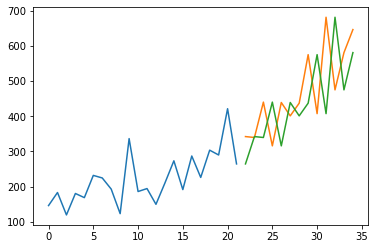

In [1]:
# evaluate a persistence forecast model
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

# Visualize Residual Forecast Errors

Ошибки вычисляются, как разность между ожидаемым и прогнозируемым значениями признака: 
* residual error = expected - forecast, или e = y - yhat

Рассчитаем ошибки модели настойчивости и выведем первые 5 значений.

In [1]:
# calculate residuals from a persistence forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


Построим линейный график ошибок. Мы ожидаем, что будут наблюдаться случайные колебания вокруг нуля и не будет тенденции или сезонной ссоставляющей.

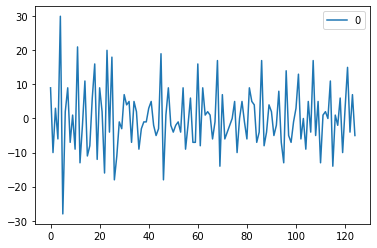

In [2]:
# line plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()

Мы можем рассчитать описательные статистики по остаточным ошибкам. В первую очередь, нас интересует среднее значение остаточных ошибок.

In [3]:
# summary statistics of residual errors
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


Наряду с описательными статистиками, можно использовать графики для лучшего понимания распределения ошибок. Мы ожидаем, что ошибки прогноза будут нормально распределены вокруг нулевого среднего. Графики помогают обнаружить перекосы в этом распределении. Мы можем использовать как гистограммы, так и графики плотности, чтобы лучше понять распределение остаточных ошибок.

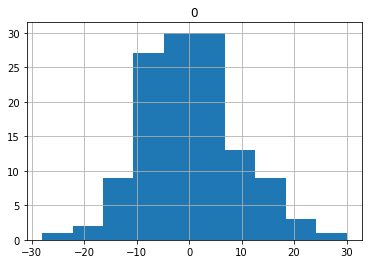

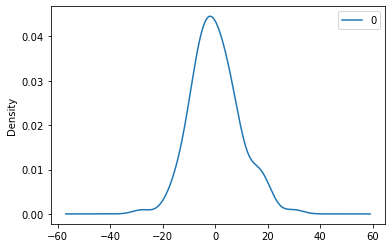

In [4]:
# density plots of residual errors
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

Q-Q график можно использовать для быстрой проверки нормальности распределения остаточных ошибок.

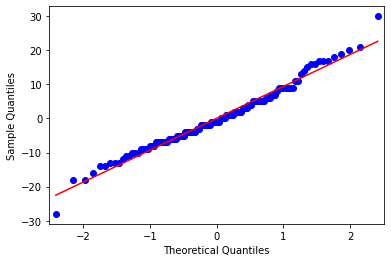

In [7]:
# qq plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

Автокорреляция вычисляет силу связи между наблюдением и его лаговым значением. Можно вычислить автокорреляцию временного ряда ошибок
и нанести результаты на график. Он называется графиком автокорреляции. Мы не ожидаем какой-либо корреляции между остатками.

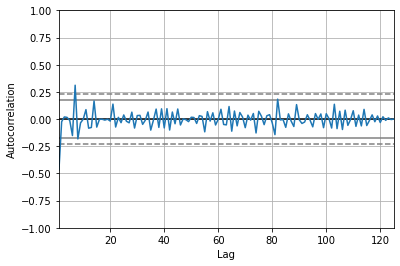

In [8]:
# autoregression plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

# Reframe Time Series Forecasting Problems

Ниже приведены 5 различных способов тренсформации (переформатирования) проблемы прогнозирования в альтернативную проблему регрессии:
1. Спрогнозировать изменение минимальной температуры по сравнению с предыдущим днем.
2. Спрогнозировать минимальную температуру относительно среднего значения за последние 14 дней.
3. Спрогнозировать минимальную температуру относительно средней температуры в том же месяце прошлого года.
4. Прогноз минимальной температуры с округлением до ближайших 5 градусов по Цельсию.
5. Спрогнозировать среднюю минимальную температуру на следующие 7 дней. 

Ниже приведен пример переформулирования задачи прогнозирования минимальной суточной температуры для прогнозирования дневной температуры, округленной до ближайших 5 градусов. 

In [1]:
# reframe precision of regression forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# round forecast to nearest 5
for i in range(len(dataframe['t+1'])):
	dataframe['t+1'][i] = int(dataframe['t+1'][i] / 5) * 5.0
print(dataframe.head(5))

      t   t+1
0   NaN  20.0
1  20.7  15.0
2  17.9  15.0
3  18.8  10.0
4  14.6  15.0


Классификация включает в себя прогнозирование категориальных признаков. Ниже приведено 5 различных способов, которыми эта проблема прогнозирования может быть трансформирована в проблему классификации:
1. Спрогнозируйте, будет ли минимальная температура холодной, умеренной или теплой.
2. Спрогнозируйте, будет ли изменение минимальной температуры небольшим или большим.
3. Спрогнозируйте, будет ли минимальная температура ежемесячным минимумом или нет.
4. Спрогнозируйте, будет ли минимум выше или ниже минимума в предыдущем году.
5. Спрогнозируйте, повысится или упадет минимальная температура в следующие 7 дней. 

Ниже приведен пример преобразования задачи прогнозирования минимальных суточных температур в задачу классификации, где каждое значение температуры является порядковым значением: холодный, умеренный или горячий. Эти ярлыки отображается в целочисленные значения по следующему правилу:
* 0 (холодный): < 10 градусов Цельсия.
* 1 (средний): >= 10 и < 25 градусов Цельсия.
* 2 (горячий): >= 25 градусов Цельсия. 

In [2]:
# reframe regression as classification
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# make discrete
for i in range(len(dataframe['t+1'])):
	value = dataframe['t+1'][i]
	if value < 10.0:
		dataframe['t+1'][i] = 0
	elif value >= 25.0:
		dataframe['t+1'][i] = 2
	else:
		dataframe['t+1'][i] = 1
print(dataframe.head(5))

      t  t+1
0   NaN  1.0
1  20.7  1.0
2  17.9  1.0
3  18.8  1.0
4  14.6  1.0
